### Importing useful modules

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from sklearn.metrics import classification_report, roc_auc_score

### Using kaggle API Key

In [ ]:
import os
import json

# Step 1: Entering my Kaggle username and key
kaggle_username = "cptnmaaz37"
kaggle_key = "7dac7b7036e9f66256d70ea6cbf7ccf3"

# Step 2: Creating the .kaggle directory and kaggle.json file
kaggle_dir = os.path.join(os.path.expanduser("~"), ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
with open(kaggle_json_path, "w") as f:
    json.dump({"username": kaggle_username, "key": kaggle_key}, f)

# Step 3: Setting correct file permissions for the API key
os.chmod(kaggle_json_path, 0o600)

print("Kaggle API key configured successfully!")

Kaggle API key configured successfully!


### Downloading Dataset

In [ ]:
# Step 4: Using the Kaggle API to download the dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --unzip



Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100%|██████████████████████████████████████▉| 2.29G/2.29G [00:12<00:00, 189MB/s]
100%|███████████████████████████████████████| 2.29G/2.29G [00:12<00:00, 197MB/s]


### Setting dataset paths

In [ ]:
# Step 2: Set the dataset directory path
DATASET_DIR = "/kaggle/input/chest-xray-pneumonia/chest_xray"  # Path where the dataset is unzipped
TRAIN_DIR = os.path.join(DATASET_DIR, 'train')
VAL_DIR = os.path.join(DATASET_DIR, 'val')
TEST_DIR = os.path.join(DATASET_DIR, 'test')

### Printing Dataset Classes

In [ ]:
import os
print("Classes in training set:", os.listdir(TRAIN_DIR))
print("Classes in validation set:", os.listdir(VAL_DIR))
print("Classes in test set:", os.listdir(TEST_DIR))

Classes in training set: ['PNEUMONIA', 'NORMAL']
Classes in validation set: ['PNEUMONIA', 'NORMAL']
Classes in test set: ['PNEUMONIA', 'NORMAL']


### **Data Preprocessing**

### Setting images dimessions

In [ ]:
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

### ImageDataGenerator for data preprocessing and augmentation

In [ ]:
data_gen = ImageDataGenerator(rescale=1.0/255.0)
data_gen_augmented = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = data_gen_augmented.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = data_gen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = data_gen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


### Building Model

In [ ]:
# Load pre-trained MobileNetV2
base_model = MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top=False, weights='imagenet')
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Building model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Model Training

In [ ]:
EPOCHS = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 757ms/step - accuracy: 0.7605 - loss: 0.5284 - val_accuracy: 0.8750 - val_loss: 0.3604
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 507ms/step - accuracy: 0.8824 - loss: 0.2647 - val_accuracy: 0.9375 - val_loss: 0.3486
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 509ms/step - accuracy: 0.9090 - loss: 0.2128 - val_accuracy: 0.9375 - val_loss: 0.3273
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 509ms/step - accuracy: 0.9217 - loss: 0.1933 - val_accuracy: 0.8125 - val_loss: 0.3148
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 87s 509ms/step - accuracy: 0.9285 - loss: 0.1788 - val_accuracy: 0.8750 - val_loss: 0.2945
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 504ms/step - accuracy: 0.9196 - loss: 0.1870 - val_accuracy: 0.7500 - val_loss: 0.3136
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 506ms/step - accuracy: 0.9147 - loss: 0.1925 - val_accuracy: 0.8750 - val_loss: 0.3000
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 86s 506ms/step - accuracy: 0.9244 - loss: 0.1783 - va

### Model Evaluation

In [ ]:
# Evaluating on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.8124 - loss: 0.3648
Test Loss: 0.2546736001968384
Test Accuracy: 0.8733974099159241


In [ ]:
# Predictions and ROC-AUC
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int)
true_labels = test_generator.classes

roc_auc = roc_auc_score(true_labels, predictions)
print(f"ROC-AUC Score: {roc_auc}")

# Classification report
print(classification_report(true_labels, predicted_labels, target_names=['Negative', 'Positive']))



20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 319ms/step
ROC-AUC Score: 0.9665351742274819
              precision    recall  f1-score   support

    Negative       0.93      0.72      0.81       234
    Positive       0.85      0.97      0.91       390

    accuracy                           0.87       624
   macro avg       0.89      0.84      0.86       624
weighted avg       0.88      0.87      0.87       624



### Visualization

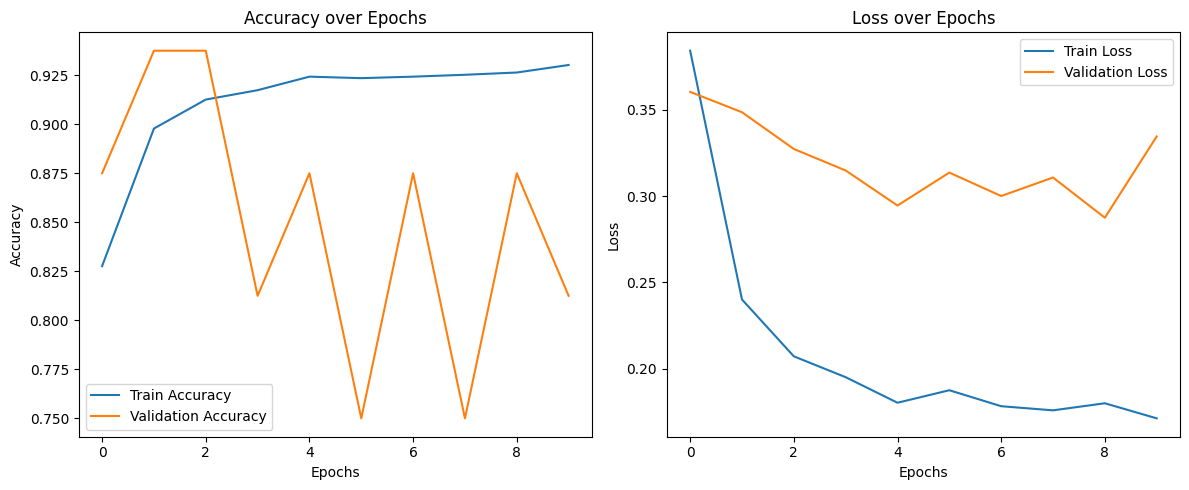

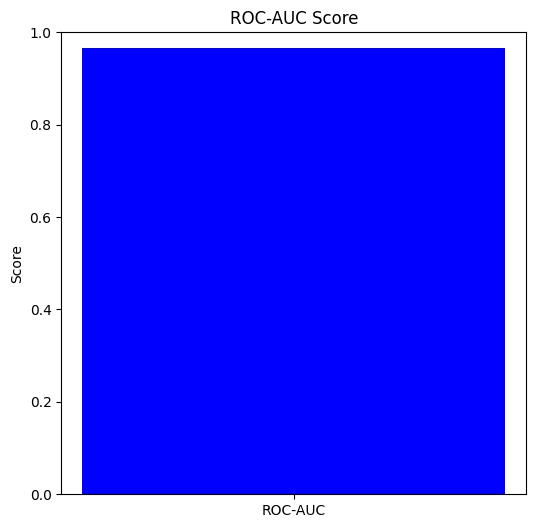

In [ ]:
# Plotting training accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot ROC-AUC and classification report metrics
plt.figure(figsize=(6, 6))

# ROC-AUC
plt.bar(['ROC-AUC'], [roc_auc], color='blue')
plt.title('ROC-AUC Score')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.show()

### Saving Deliverables

In [ ]:
# Saving the model
model.save("pneumonia_detection_model.h5")

# Save the summary report
with open("summary_report.txt", "w") as f:
    f.write(f"Test Accuracy: {test_accuracy}\n")
    f.write(f"ROC-AUC Score: {roc_auc}\n")
    f.write("Classification Report:\n")
    f.write(classification_report(true_labels, predicted_labels, target_names=['Negative', 'Positive']))